# Implementação de Multi Layer Perceptron para Classificação

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento dos dados

In [2]:
df_train = pd.read_csv('../data/bebidas.csv')
df_test = pd.read_csv('../data/bebidasTestes.csv')
display(df_train.head())
display(df_test.head())

,x1,x2,x3,x4,d1,d2,d3
0,0.3841,0.2021,0.0000,0.2438,1,0,0
1,0.1765,0.1613,0.3401,0.0843,1,0,0
2,0.3170,0.5786,0.3387,0.4192,0,1,0
3,0.2467,0.0337,0.2699,0.3454,1,0,0
4,0.6102,0.8192,0.4679,0.4762,0,1,0


,x1,x2,x3,x4,d1,d2,d3
0,0.8622,0.7101,0.6236,0.7894,0,0,1
1,0.2741,0.1552,0.1333,0.1516,1,0,0
2,0.6772,0.8516,0.6543,0.7573,0,0,1
3,0.2178,0.5039,0.6415,0.5039,0,1,0
4,0.7260,0.7500,0.7007,0.4953,0,0,1


In [3]:
# Verifica informações dos DataFrames
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      130 non-null    float64
 1   x2      130 non-null    float64
 2   x3      130 non-null    float64
 3   x4      130 non-null    float64
 4   d1      130 non-null    int64  
 5   d2      130 non-null    int64  
 6   d3      130 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 7.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      18 non-null     float64
 1   x2      18 non-null     float64
 2   x3      18 non-null     float64
 3   x4      18 non-null     float64
 4   d1      18 non-null     int64  
 5   d2      18 non-null     int64  
 6   d3      18 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 1.1 KB


None

## Manipulação dos dados

In [4]:
# Dados de treino
X_train = df_train[['x1', 'x2', 'x3', 'x4']]
y_train = np.argmax(df_train[['d1', 'd2', 'd3']], axis=1)

In [5]:
# Dados de teste
X_test = df_test[['x1', 'x2', 'x3', 'x4']]
y_test = np.argmax(df_test[['d1', 'd2', 'd3']], axis=1)

## Modelo MLP

In [6]:
# Declaração do modelo 
model = MLPClassifier(activation='logistic', learning_rate='constant',
                      learning_rate_init=.001, epsilon=10e-6, max_iter=5000)

In [7]:
# Declaração do grid de parâmetros
param_grid = {
    'hidden_layer_sizes': [5, 10, 15]
}

In [8]:
# Executa cross validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1)
_ = grid_search.fit(X_train, y_train)

In [9]:
# Mostra resultados do cross validation
results = grid_search.cv_results_
df_cv_results = pd.DataFrame(results).sort_values('rank_test_score')
df_cv_results.loc[:, ~df_cv_results.columns.str.contains('split|time')]

,param_hidden_layer_sizes,params,mean_test_score,std_test_score,rank_test_score
0,5,{'hidden_layer_sizes': 5},0.930769,0.028782,1
1,10,{'hidden_layer_sizes': 10},0.930769,0.028782,1
2,15,{'hidden_layer_sizes': 15},0.930769,0.028782,1


Neurônios na camada oculta: 5
Accuracy (%): 100.0
MSE: 0.0
Perda final: 0.22062926077647524

Neurônios na camada oculta: 10
Accuracy (%): 100.0
MSE: 0.0
Perda final: 0.20603566662967024

Neurônios na camada oculta: 15
Accuracy (%): 100.0
MSE: 0.0
Perda final: 0.18954613129383477



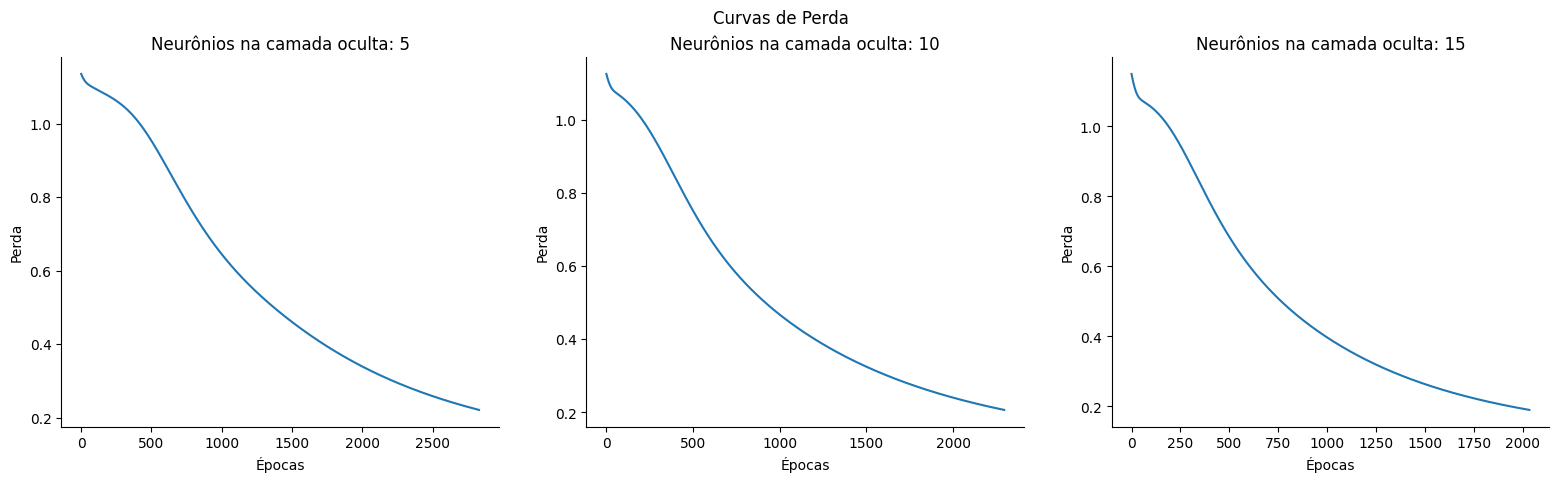

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6.4*3, 4.8))
for i, params in enumerate(results['params']):
    model = grid_search.best_estimator_.set_params(**params)
    model.fit(X_train, y_train)
    print(f'Neurônios na camada oculta: {params["hidden_layer_sizes"]}')
    print(f'Accuracy (%): {accuracy_score(y_test, model.predict(X_test)) * 100}')
    print(f'MSE: {mean_squared_error(y_test, model.predict(X_test))}')
    print(f'Perda final: {model.loss_}\n')
    axes[i].plot(model.loss_curve_)
    axes[i].set_title(f'Neurônios na camada oculta: {params["hidden_layer_sizes"]}')
    axes[i].set_xlabel('Épocas')
    axes[i].set_ylabel('Perda')
    sns.despine()
plt.suptitle('Curvas de Perda');